In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 161602161.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109328243.52it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 76433047.05it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19761959.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        # Introduce noise
        noise = torch.randn_like(encoded) * 0.5
        encoded_noisy = encoded + noise
        decoded = self.decoder(encoded_noisy)
        decoded = decoded.view(-1, 1, 28, 28)
        return decoded, encoded_noisy

In [ ]:
def train(model, criterion, optimizer, train_loader, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, _) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs, encoded = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        print('Epoch: [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss))


In [ ]:
def test(model, criterion, test_loader):
    with torch.no_grad():
        test_loss = 0.0
        for inputs, _ in test_loader:
            outputs, encoded = model(inputs)
            test_loss += criterion(outputs, inputs).item()

        test_loss /= len(test_loader.dataset)
        print('Test set loss: {:.4f}'.format(test_loss))

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train(model, criterion, optimizer, train_loader, num_epochs=10)

Epoch: [1/10], Loss: 0.1513
Epoch: [2/10], Loss: 0.1020
Epoch: [3/10], Loss: 0.0939
Epoch: [4/10], Loss: 0.0875
Epoch: [5/10], Loss: 0.0812
Epoch: [6/10], Loss: 0.0758
Epoch: [7/10], Loss: 0.0718
Epoch: [8/10], Loss: 0.0695
Epoch: [9/10], Loss: 0.0678
Epoch: [10/10], Loss: 0.0664


In [ ]:
test(model, criterion, test_loader)

Test set loss: 0.0001


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

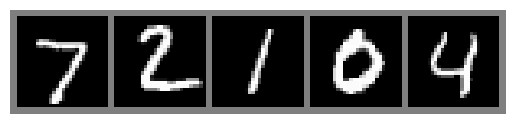

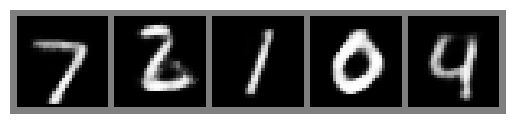

In [ ]:
dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed, _ = model(images)
imshow(make_grid(images[:5]))  # Using your defined imshow function
imshow(make_grid(reconstructed[:5]))
